### Instantiate environment

In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import numpy as np
import math

### Read data

In [2]:
train_df = PandasTools.LoadSDF("data/TR_AOH_516.sdf")
test_df = PandasTools.LoadSDF("data/TST_AOH_176.sdf")

### Concatenate data

In [3]:
AOH = pd.concat([train_df[["Canonical_QSARr", "LogOH"]], test_df[["Canonical_QSARr", "LogOH"]]], ignore_index = True)

### Calculate features

In [4]:
nms = [x[0] for x in Descriptors._descList]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(nms)
for i in range(len(AOH)):
    descrs = calc.CalcDescriptors(Chem.MolFromSmiles(AOH.iloc[i, 0]))
    for x in range(len(descrs)):
        AOH.at[i, str(nms[x])] = str(descrs[x])

### Training & Test Datasets

In [5]:
X = AOH.drop(columns=["Canonical_QSARr", "LogOH"])
y = AOH[["LogOH"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 350)

In [6]:
pd.to_numeric(y_train['LogOH']).describe()

count    519.000000
mean     -11.433391
std        1.274721
min      -16.000000
25%      -12.000000
50%      -11.113509
75%      -10.545918
max       -9.259637
Name: LogOH, dtype: float64

In [7]:
pd.to_numeric(y_test['LogOH']).describe()

count    173.000000
mean     -11.395769
std        1.329613
min      -16.221849
25%      -12.071092
50%      -11.020907
75%      -10.424812
max       -9.537602
Name: LogOH, dtype: float64

In [76]:
import seaborn as sns

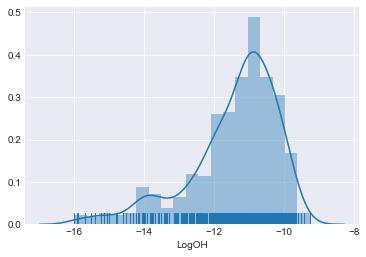

In [79]:
sns.distplot(pd.to_numeric(y_train['LogOH']), rug = True)

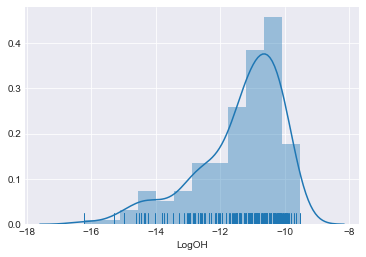

In [80]:
sns.distplot(pd.to_numeric(y_test['LogOH']), rug = True)

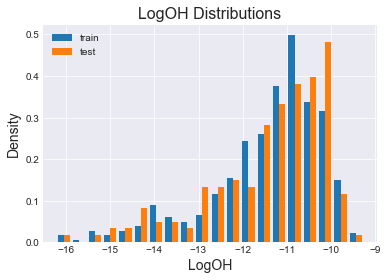

In [90]:
# create dataframe, select columns
df1x = pd.to_numeric(y_train['LogOH'])
df2x = pd.to_numeric(y_test['LogOH'])
#Stack the data
plt.figure()
plt.hist([df1x,df2x], bins = 20, stacked = False, density = True)
plt.title('LogOH Distributions', fontsize = 16)
plt.xlabel('LogOH', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(['train', 'test'])
plt.show()

In [92]:
type(y['LogOH'])

pandas.core.series.Series